### 3.8 Tree-based Models and Random Forest

In examining the predictive dynamics of energy consumption through panel data, regression trees emerge as a fundamental methodology, recognized for their non-parametric essence. Non-parametric means that they don't rely on assumptions about how predictors directly relate to the outcome, unlike linear models. Regression trees excel at handling nonlinear relationships and automatically consider how different variables interact. This ability allows them to be incredibly effective in both classification and regression tasks, explaining why they're becoming increasingly popular in modern studies (Herlau et al., 2009).

Central to the approach of regression trees is their strategy of segmenting the feature space into binary divisions based on the explanatory variables. The process begins with identifying the optimal split-points by assessing the impurity measure to estimate the effectiveness of a division. The paramount split is the one offering the most substantial improvement in fit. This iterative subdivision continues until a predefined stop criterion is met, terminating in terminal nodes or regions, which indicate the final branch outcomes. This process is illustrated in the picture below:


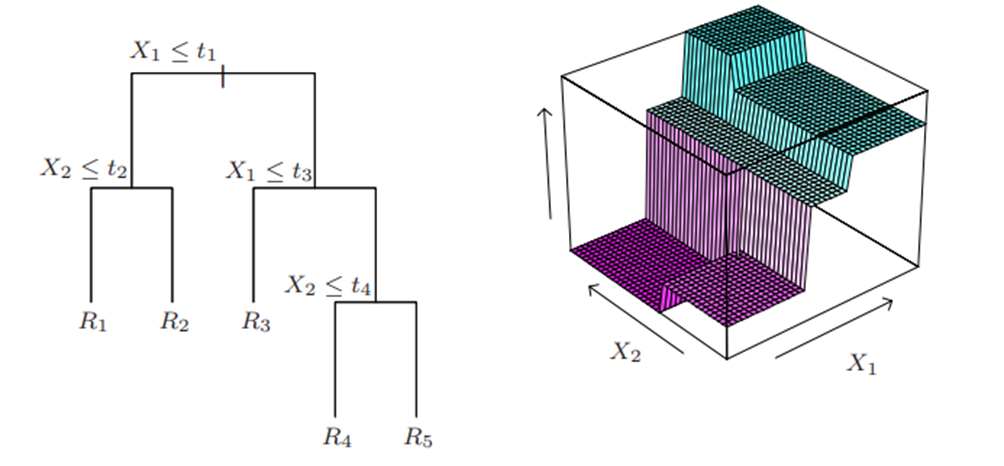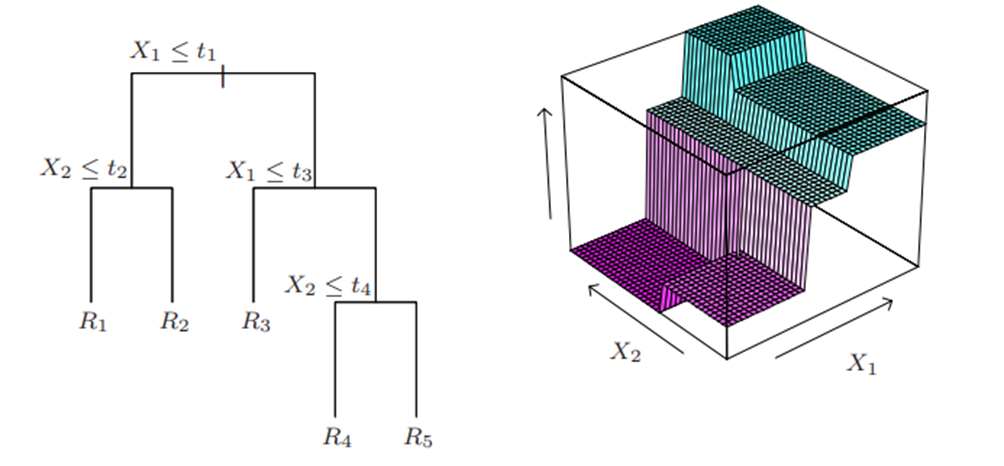

The figure to the left illustrates the binary partitioning, while the picture to the right illustrates the prediction surface.

Let's redefine the concept of predicting \( Y \), denoted as \( \hat{f}(X) \), within the framework of a dataset comprising \( p \) inputs, observable across \( N \) instances for a response variable, \( y_i \). In this scenario, the prediction of \( Y \) within a specific region, \( R_m \), is given as:

\[ \hat{f}(X) = \sum_{i=1}^M c_m I(x \in R_m) \]

Here, \( c_m \) symbolizes the uniform predicted value within region \( R_m \). In the domain of regression trees, this constant \( c_m \) is determined as the mean of the \( y_i \) values for the training data allocated to \( R_m \):

\[ \hat{c}_m = \text{ave}(y_i | x_i \in R_m) \]

The formation of these regions depends on the impurity measure. The impurity measure is a metric that is used to determine how well a split organizes the data into homogeneous subsets. A common impurity measure for regression is the mean sum-of-squares between the observed \( y_i \) values and the mean value \( \hat{c}_m \). To reach the optimal tree dimension, a stopping criterion is employed, such as when the node's size descends to a predetermined minimal value. The dimensions of the tree and the minimal node size stand as critical hyperparameters that influence the model's complexity. Typically, a cost-complexity algorithm is applied for tree pruning post its initial expansion. This pruning mechanism leverages a tuning parameter (\( \alpha \)), balancing the trade-off between tree size and data fit accuracy. Mirroring penalized regression, this tuning parameter and the cost-complexity algorithm orchestrate the model's precision (Herlau et al., 2009).

Larger \( \alpha \) values prompt more stringent pruning, potentially oversimplifying the data's inherent complexity (i.e., introducing high bias). On the other hand, lower \( \alpha \) values promote the development of extensive trees that involve terminal nodes with fewer observations, raising variance. The basis of modern tree-based models is their sensitivity to small data changes that are due to their layered nature. The initial splits impact all of the subsequent regions, suggesting the importance of initial data representation for the model.

#### Random Forest

Random Forest (RF) is a technique that builds upon the idea of combining multiple decision trees to enhance prediction accuracy, effectively tackling the limitations of individual trees. This method is considered an ensemble approach because it pools together the outcomes of numerous trees. Originating as a significant improvement over bagging, RF incorporates the principle of bootstrap sampling. In bagging, multiple trees are grown using bootstrap samples from the original dataset, and their predictions are averaged to formulate the outcome. This strategy inherently leads to a model that is unbiased and exhibits decreased variance, with the bagging estimate described as:

\[ \hat{f}_{\text{bag}}(x) = \frac{1}{B} \sum_{b=1}^B \hat{f}_b^*(x) \]

where \( \hat{f}_b^*(x) \) is the prediction from the \( b \)-th bootstrapped tree. The variance of this aggregated prediction, assuming each of the \( B \) bagged trees have a variance of \( \sigma^2 \), is reduced to:

\[ \rho \sigma^2 + \frac{1-\rho}{B} \sigma^2 \]

As proved by Hastie et al. (2017, pp. 588). Here, \( \rho \) indicates the pairwise correlation between the bootstrapped trees. While augmenting the number of trees (\( B \)) mitigates the second variance component, the overall variance remains influenced by the correlation among the tree pairs, which limits the effectiveness of simple averaging.

RF seeks to enhance variance reduction by introducing diversity among the trees, specifically by randomizing the subset of input variables considered at each split in the tree-building process. This random selection of a subset of variables (\( m \leq p \)) for each split effectively decreases the correlation among trees, thus increasing the benefits of ensemble averaging. The balance between reducing correlation among trees and maintaining predictive strength is sensitive, with the choice of \( m \) acting as a critical hyperparameter that requires careful tuning. The RF regression algorithm is given as:
